## Data Reading

In [ ]:
## upload data file
from google.colab import files
uploaded = files.upload()

Saving breast-cancer-wisconsin.data to breast-cancer-wisconsin (3).data


In [ ]:
!pip install nolearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install gdbn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## Required imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from keras import optimizers
import cv2

In [ ]:
# Read csv file
df =  pd.read_csv('breast-cancer-wisconsin.data',  sep=",", header=None)
## Display head
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
## Assign headers names
df.columns=["ID","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses","Class" ]
## Display head
df.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
## Print size 
df.shape

(699, 11)

The dataframe contains 699 rows and 11 columns

-----------------------------------


## Data Pre-processing

In [ ]:
## Print columns' datatype
df.dtypes

ID                              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

The datatype of 'Bare Nuclei' column is not correctly assigned. 

print the unique values of this column to show what is wrong

In [ ]:
## Print unique values
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

There are datapoints contain '?' as a value so this is an indication for missing values

Print how many rows have '?' value to decide how to deal with them

In [ ]:
## Print '?' counts
(df['Bare Nuclei'] == '?').sum()

16

16 values which means it is 2.288% of the whole data.


As we are dealing with medical records so we need the values to be accurate. 
We can not replace the missing values by the mean or the median values. So, We are going to drop them.

In [ ]:
## Drop '?' values
df.drop(df[df['Bare Nuclei'] == '?'].index, inplace=True)

In [ ]:
## Run again to check '?' values are successfully dropped
(df['Bare Nuclei'] == '?').sum()

0

Now, we want to drop the ID column as it does not affect the dataset, aslo we need to change the datatype of 'Bare Nuclei' into int64

In [ ]:
## Drop ID column
df.drop(['ID'], axis=1, inplace = True)
## Display head
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
## Display size of data
df.shape

(683, 10)

In [ ]:
## Convert datatype from obj into int
df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)

In [ ]:
#3 Display datatypes
df.dtypes

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

The datatype of 'Bare Nuclei' is changed successfully


In [ ]:
## Check unique values of 'class' column are two values only
df['Class'].nunique()

2

In [ ]:
## Print unique values
df['Class'].unique()

array([2, 4])

In [ ]:
## Change value 2 to 0 and 4 to 1 (0 : benign , 1 : malignant)
Class = { 2 :0, 4 :1}
df['Class'] = df['Class'].map(Class)
## Print unique values
df['Class'].unique()

array([0, 1])

The values are changed successfully

In [ ]:
## Show descriptive statistics
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


The features values are ranged from 1-10 and the target values are ranged from 0-1

In [ ]:
## Show nulls count in each col
df.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Data does not contain null values



-----------------------------------




## Data Visualization

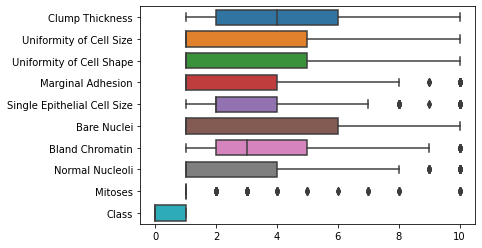

In [ ]:
## Visualize the data using boxplot
sns.boxplot(data=df , orient ='h', width = 0.7);

The extreme values is not considered as outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


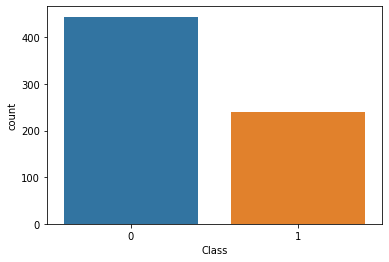

In [ ]:
## show the distribution of the two classes 
sns.countplot(df['Class']);

0 class (Benign) has more values than 1 class (malignant)

In [ ]:
## Show count of each class
df['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

Class 0 has nearly double the values of class 1.

<ipython-input-25-b181f01f7e84>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax);


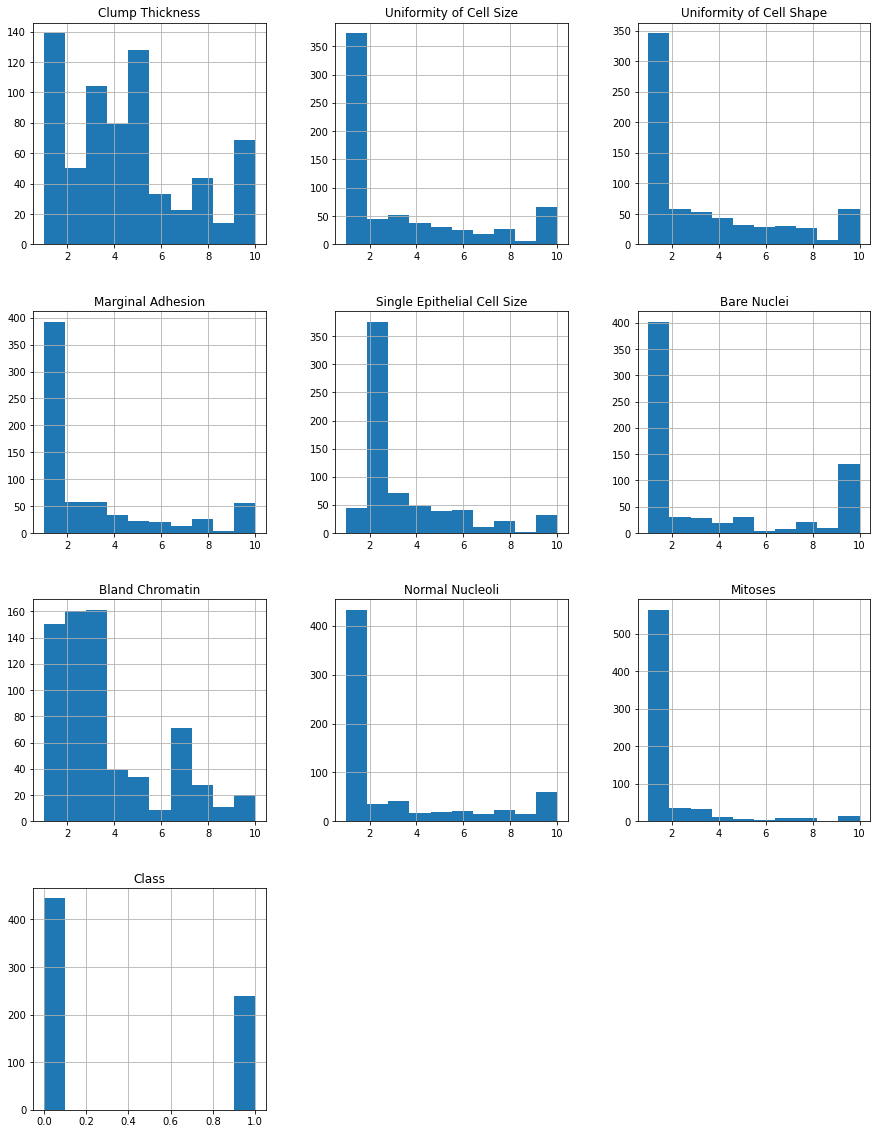

In [ ]:
## plot the distribution of the data using histogram
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax);

Most of data is skewed towards low values. \
This is expected as low values indicates that the tumor is benign, and the benign class has more values than the other class

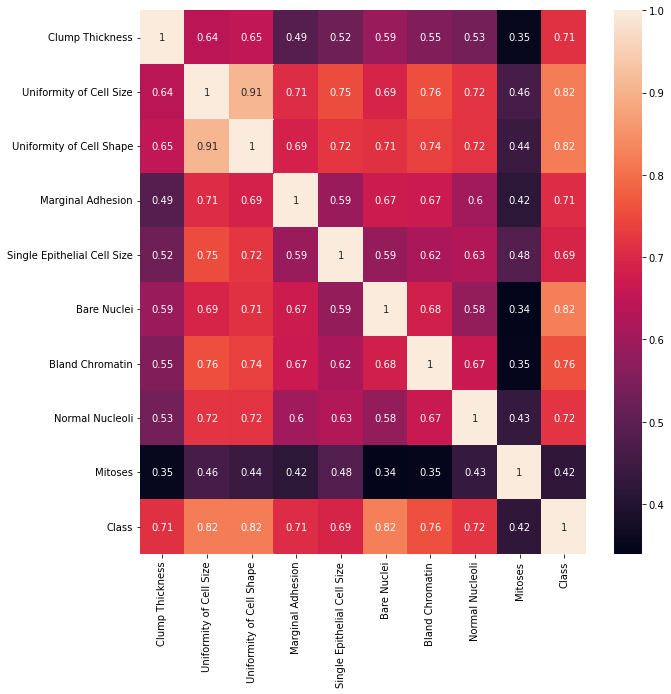

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True);

Uniformity of cell size and cell shape are highly correlated with one another, so we will remove one of them.

In [ ]:
df.drop(['Uniformity of Cell Size'], axis = 1, inplace = True)

_______

## Data Separating

In [ ]:
## Assign features to feature vector X
X = df.drop(['Class'], axis = 1)
## Display head
X.head()

,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,2,1,3,1,1
1,5,4,5,7,10,3,2,1
2,3,1,1,2,2,3,1,1
3,6,8,1,3,4,3,7,1
4,4,1,3,2,1,3,1,1


In [ ]:
## Assign target to y
y = df['Class']
## Display head
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

__________

## Data Splitting

In [ ]:
## Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

___________

## Feature Scaling

In [ ]:
## Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

____________

## MLP

### Model 1 : 

In [ ]:
## Initializing mlp network
mlp = tf.keras.models.Sequential(layers = None, name = None)

In [ ]:
## Adding the input layer & the first hidden layer
mlp.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))

In [ ]:
## Adding the second hidden layer
mlp.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))

In [ ]:
## Adding the output layer
mlp.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
## Compiling the mlp
mlp.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
## Training the mlp
mlp.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 2ms/step - loss: 0.6243 - accuracy: 0.7218
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.9226
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.9665
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.9665
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.9686
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2745 - accuracy: 0.9707
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.9686
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.9686
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1695 - accuracy: 0.9707
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1486 - accuracy: 0.9728
Epoch 11/

In [ ]:
## Make predictions
mlp_y_pred = mlp.predict(X_test)
mlp_y_pred = (mlp_y_pred > 0.5)


7/7 [==============================] - 0s 3ms/step


In [ ]:
## Print confusion matrix
mlp_cm = confusion_matrix(y_test, mlp_y_pred)
mlp_cm

array([[125,   5],
       [  3,  72]])

Model 1 makes 197 correct predictions and 8 wrong predictions

In [ ]:
## Print accuracy score
accuracy_score(y_test, mlp_y_pred)

0.9609756097560975

Epoch 1/100
15/15 [==============================] - 0s 31ms/step - loss: 0.0510 - accuracy: 0.9833 - val_loss: 0.1022 - val_accuracy: 0.9610
Epoch 2/100
15/15 [==============================] - 0s 12ms/step - loss: 0.0507 - accuracy: 0.9833 - val_loss: 0.1027 - val_accuracy: 0.9610
Epoch 3/100
15/15 [==============================] - 0s 13ms/step - loss: 0.0504 - accuracy: 0.9833 - val_loss: 0.1023 - val_accuracy: 0.9610
Epoch 4/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0501 - accuracy: 0.9833 - val_loss: 0.1027 - val_accuracy: 0.9610
Epoch 5/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0500 - accuracy: 0.9833 - val_loss: 0.1029 - val_accuracy: 0.9610
Epoch 6/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0496 - accuracy: 0.9854 - val_loss: 0.1035 - val_accuracy: 0.9610
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0495 - accuracy: 0.9854 - val_loss: 0.1039 - val_accuracy: 0.9610
Epoch 8/

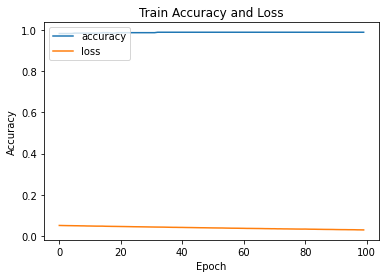

In [ ]:
mlp_history1 = mlp.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test,y_test))
plt.plot(mlp_history1.history['accuracy'])
plt.plot(mlp_history1.history['loss'])
plt.title('Train Accuracy and Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [ ]:
results = mlp.evaluate(X_test, y_test, batch_size=32)
print("test loss:", results[0])
print("test accuracy:",results[1]*100,'%')

7/7 [==============================] - 0s 5ms/step - loss: 0.1333 - accuracy: 0.9561
test loss: 0.13328252732753754
test accuracy: 95.60975432395935 %


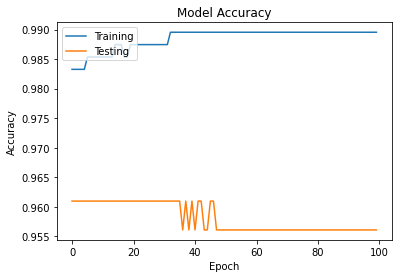

In [ ]:
plt.plot(mlp_history1.history['accuracy'])
plt.plot(mlp_history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()

### Model 2 :

In [ ]:
## build another model 
mlp2 = tf.keras.models.Sequential(layers = None, name = None)
mlp2.add(tf.keras.layers.Dense(units = 15, activation = 'softmax'))
mlp2.add(tf.keras.layers.Dense(units = 15, activation = 'softmax'))
mlp2.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))
mlp2.add(tf.keras.layers.Dense(units = 1, activation = 'relu'))
mlp2.compile(optimizer = optimizers.RMSprop(lr=0.01), loss = 'mean_squared_error', metrics= ['accuracy'])


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
mlp2.fit(X_train, y_train, batch_size=5, epochs=10)

Epoch 1/10
96/96 [==============================] - 3s 4ms/step - loss: 0.3431 - accuracy: 0.6569
Epoch 2/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.6569
Epoch 3/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.6569
Epoch 4/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.6569
Epoch 5/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.6569
Epoch 6/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.6569
Epoch 7/10
96/96 [==============================] - 0s 4ms/step - loss: 0.3431 - accuracy: 0.6569
Epoch 8/10
96/96 [==============================] - 0s 4ms/step - loss: 0.3431 - accuracy: 0.6569
Epoch 9/10
96/96 [==============================] - 0s 4ms/step - loss: 0.3431 - accuracy: 0.6569
Epoch 10/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.6569


In [ ]:
## Make predictions
mlp2_y_pred = mlp2.predict(X_test)
mlp2_y_pred = (mlp2_y_pred > 0.5)


7/7 [==============================] - 0s 3ms/step


In [ ]:
## Print confusion matrix
mlp2_cm = confusion_matrix(y_test, mlp2_y_pred)
mlp2_cm

array([[130,   0],
       [ 75,   0]])

Model 2 makes 130 correct predictions and 75 wrong predictions 

In [ ]:
## Print accuracy score
accuracy_score(y_test, mlp2_y_pred)

0.6341463414634146

Epoch 1/10
96/96 [==============================] - 1s 9ms/step - loss: 0.3431 - accuracy: 0.6569 - val_loss: 0.3659 - val_accuracy: 0.6341
Epoch 2/10
96/96 [==============================] - 1s 5ms/step - loss: 0.3431 - accuracy: 0.6569 - val_loss: 0.3659 - val_accuracy: 0.6341
Epoch 3/10
96/96 [==============================] - 0s 4ms/step - loss: 0.3431 - accuracy: 0.6569 - val_loss: 0.3659 - val_accuracy: 0.6341
Epoch 4/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.6569 - val_loss: 0.3659 - val_accuracy: 0.6341
Epoch 5/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.6569 - val_loss: 0.3659 - val_accuracy: 0.6341
Epoch 6/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.6569 - val_loss: 0.3659 - val_accuracy: 0.6341
Epoch 7/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.6569 - val_loss: 0.3659 - val_accuracy: 0.6341
Epoch 8/10
96/96 [==

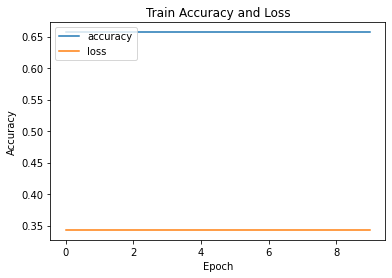

In [ ]:
## Plot learning curve
mlp_history2 = mlp2.fit(X_train, y_train, epochs=10, batch_size=5, validation_data=(X_test,y_test))
plt.plot(mlp_history2.history['accuracy'])
plt.plot(mlp_history2.history['loss'])
plt.title('Train Accuracy and Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

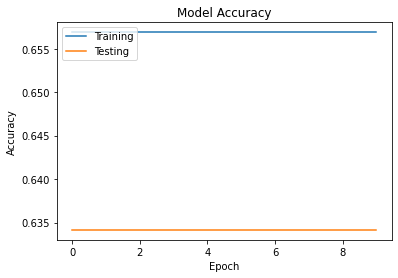

In [ ]:
plt.plot(mlp_history2.history['accuracy'])
plt.plot(mlp_history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()

## RBFN

A radial basis function network will be implemented using sklearn and keras

In [ ]:
from keras import backend as K
from keras.layers import Layer
from keras.initializers import RandomUniform, Initializer, Constant
from keras.initializers import Initializer
from sklearn.cluster import KMeans
from keras.models import Sequential 
from keras.layers.core import Dense
from keras.layers import Activation
from keras.optimizers import RMSprop
from keras.optimizers import SGD

In [53]:
#DEFINING CLASSES TO CCONSTRUCT RBFN
class RBFLayer(Layer):
    def __init__(self, output_dim, initializer=None, betas=1.0, **kwargs):
        self.output_dim = output_dim
        self.init_betas = betas
        if not initializer:
            self.initializer = RandomUniform(0.0, 1.0)
        else:
            self.initializer = initializer
        super(RBFLayer, self).__init__(**kwargs)

    def build(self, input_shape):

        self.centers = self.add_weight(name='centers',
                                       shape=(self.output_dim, input_shape[1]),
                                       initializer=self.initializer,
                                       trainable=True)
        self.betas = self.add_weight(name='betas',
                                     shape=(self.output_dim,),
                                     initializer=Constant(
                                         value=self.init_betas),
                                     trainable=True)

        super(RBFLayer, self).build(input_shape)

    def call(self, x):

        C = K.expand_dims(self.centers)
        H = K.transpose(C-K.transpose(x))
        return K.exp(-self.betas * K.sum(H**2, axis=1))

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)
##############################################################
class InitCentersKMeans(Initializer):
    def __init__(self, X, max_iter=100):
        self.X = X
        self.max_iter = max_iter

    def __call__(self, shape, dtype=None):
        shape[1] == self.X.shape[1]

        n_centers = shape[0]
        km = KMeans(n_clusters=n_centers, max_iter=self.max_iter, verbose=0)
        km.fit(self.X)
        return km.cluster_centers_

##############################################################
#BUILDING AND TRAINING MODEL
model = Sequential()
rbflayer = RBFLayer(34,
                        initializer=InitCentersKMeans(X_train),
                        betas=3.0,
                        input_shape=(8,))
model.add(rbflayer)
model.add(Dense(4))
model.add(Activation('linear'))
model.compile(loss='mean_squared_error',
                  optimizer=RMSprop(), metrics=['accuracy'])
print(model.summary())
history1 = model.fit(X_train, y_train, epochs=1000, batch_size=32)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rbf_layer (RBFLayer)        (None, 34)                306       
                                                                 
 dense_7 (Dense)             (None, 4)                 140       
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
Total params: 446
Trainable params: 446
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
15/15 [==============================] - 1s 3ms/step - loss: 0.3440 - accuracy: 0.1004
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.3293 - accuracy: 0.1004
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.3181 - accuracy: 0.1213
Epoch 4/1000
15

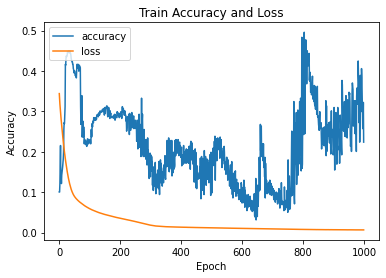

In [54]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('Train Accuracy and Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [55]:
results = model.evaluate(X_test, y_test, batch_size=32)
print("test loss:", results[0])
print("test accuracy:",results[1]*100,'%')

7/7 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.1463
test loss: 0.05923429876565933
test accuracy: 14.63414579629898 %


Since the accuracy is very poor, let us try to alter the hyper-parameters.

In [56]:
model = Sequential()
rbflayer = RBFLayer(20,
                        initializer=InitCentersKMeans(X_train),
                        betas=3.0,
                        input_shape=(8,))
model.add(rbflayer)
model.add(Dense(4))
model.add(Activation('relu'))
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])
print(model.summary())
history1 = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test,y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rbf_layer_1 (RBFLayer)      (None, 20)                180       
                                                                 
 dense_8 (Dense)             (None, 4)                 84        
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                                 
Total params: 264
Trainable params: 264
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
15/15 [==============================] - 1s 16ms/step - loss: 2.1825 - accuracy: 0.4435 - val_loss: 1.7744 - val_accuracy: 0.4537
Epoch 2/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.6129 - accuracy: 0.4435 - val_loss: 1.5988 - val_accuracy: 0.4537
Epoch 3/1000
15/15 [==========

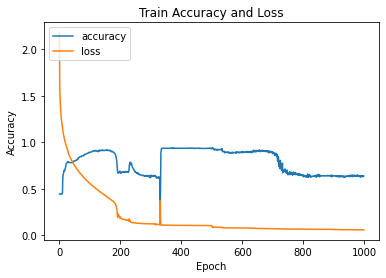

7/7 [==============================] - 0s 4ms/step - loss: 0.1627 - accuracy: 0.6049
test loss: 0.16268958151340485
test accuracy: 60.48780679702759 %


In [57]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('Train Accuracy and Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()
results = model.evaluate(X_test, y_test, batch_size=32)
print("test loss:", results[0])
print("test accuracy:",results[1]*100,'%')

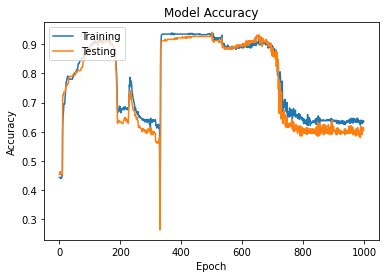

In [58]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()

## **DBN**

In [59]:
##from dbn.tensorflow import SupervisedDBNClassification



In [60]:
##Training the model1


In [61]:
classifier = SupervisedDBNClassification(hidden_layers_structure=[256, 256],
                                         learning_rate_rbm=0.05,
                                         learning_rate=0.1,
                                         n_epochs_rbm=10,
                                         n_iter_backprop=100,
                                         batch_size=32,
                                         activation_function='relu',
                                         dropout_p=0.2)

NameError: ignored

In [ ]:
classifier.fit(X_train, Y_train)


In [ ]:
##Testing the model1
##learning curve

import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('Train Accuracy and Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [ ]:
Y_pred = classifier.predict(X_test)
print('Done.\nAccuracy: %f' % accuracy_score(Y_test, Y_pred))

In [ ]:
##Training the model2


In [ ]:
classifier2 = SupervisedDBNClassification(hidden_layers_structure=[50, 20],
                                         learning_rate_rbm=0.08,
                                         learning_rate=0.1,
                                         n_epochs_rbm=10,
                                         n_iter_backprop=100,
                                         batch_size=32,
                                         activation_function='sigmoid',
                                         dropout_p=0.2)

In [ ]:
classifier2.fit(X_train, Y_train)


In [ ]:
##Testing the model2
##learning curve

import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('Train Accuracy and Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [ ]:
Y_pred = classifier2.predict(X_test)
print('Done.\nAccuracy: %f' % accuracy_score(Y_test, Y_pred))